In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data1 = pd.read_csv("train.csv")
data1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<h3> Shape of the Dataset </h3>

In [3]:
data1.shape

(10886, 12)

<h3> Some basic info </h3>

In [4]:
data1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data1.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

<h3> Feature Engineering </h3>

In [6]:
# from the preview of our data, we can see that columns "season", "holiday", "workingday", "weather" are 
# categorical data types, but current datatype is int, hence we need to do some transformation

# create "date", "hour", "weekDay", "month" based on "datetime" feature, and then drop datetime columns
# transforming "season", "holiday", "workingday", "weather" to category by using dummy variables


In [7]:
# 1. Datetime -> date, hour, weekday, month
data1['date'] = data1.datetime.apply(lambda x: x.split()[0])
data1.datetime = data1.datetime.apply(pd.to_datetime)

data1['year'] = data1.datetime.apply(lambda x: x.year)
data1['month'] = data1.datetime.apply(lambda x: x.month)
# data1['date'] = data1.datetime.apply(lambda x: x.day)

data1['hour'] = data1.datetime.apply(lambda x: x.hour)
data1['weekday'] = data1.date.apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
data1.head()
data1['date'] = data1.datetime.apply(lambda x: x.day)

In [8]:
# 2. season -> 1. spring, 2. summer, 3. fall, 4. winter
data1['season'] = data1.season.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,1,0,Saturday
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,1,Saturday
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,1,2,Saturday
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,1,3,Saturday
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,1,4,Saturday


In [9]:
data1['weather'] = data1.weather.map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' })

In [10]:
# transforming into category type:
categoryColumns = ['hour', 'weekday', 'month', 'season', 'weather', 'holiday', 'workingday']

for value in categoryColumns:
    data1[value] = data1[value].astype("category")

In [11]:
data1_new = data1.drop(['datetime'], axis = 1)
data1_new

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0000,3,13,16,1,2011,1,0,Saturday
1,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,8,32,40,1,2011,1,1,Saturday
2,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,5,27,32,1,2011,1,2,Saturday
3,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,3,10,13,1,2011,1,3,Saturday
4,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,0,1,1,1,2011,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",15.58,19.695,50,26.0027,7,329,336,19,2012,12,19,Wednesday
10882,Winter,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.76,17.425,57,15.0013,10,231,241,19,2012,12,20,Wednesday
10883,Winter,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",13.94,15.910,61,15.0013,4,164,168,19,2012,12,21,Wednesday
10884,Winter,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",13.94,17.425,61,6.0032,12,117,129,19,2012,12,22,Wednesday


In [12]:
# check for missing values:
data1_new.isnull().values.any()

False

In [13]:
data1_new.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  date        10886 non-null  int64   
 12  year        10886 non-null  int64   
 13  month       10886 non-null  category
 14  hour        10886 non-null  category
 15  weekday     10886 non-null  category
dtypes: category(7), float64(3), int64(6)
memory usage: 842.1 KB


<h3> Outliers Analysis </h3>

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Boxplot on Count vs Working Day')]

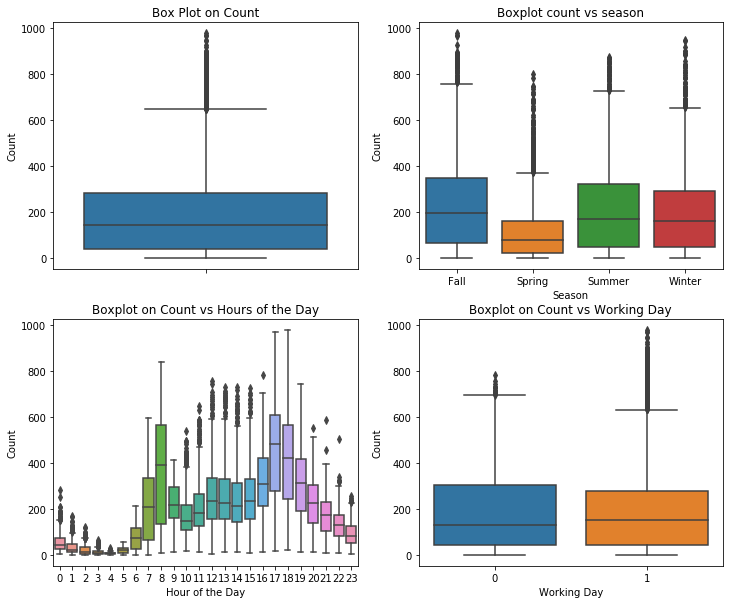

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12, 10)
sns.boxplot(data = data1_new, y = 'count', orient = 'v', ax = axes[0][0])
sns.boxplot(data = data1_new, y = 'count', x = 'season', orient = 'v', ax = axes[0][1])
sns.boxplot(data = data1_new, y = 'count', x = 'hour', orient = 'v', ax = axes[1][0])
sns.boxplot(data = data1_new, y = 'count', x = 'workingday', orient = 'v', ax = axes[1][1])

axes[0][0].set(ylabel = 'Count', title = 'Box Plot on Count')
axes[0][1].set(xlabel = 'Season', ylabel = 'Count', title = "Boxplot count vs season")
axes[1][0].set(xlabel = "Hour of the Day", ylabel = "Count", title = "Boxplot on Count vs Hours of the Day")
axes[1][1].set(xlabel = 'Working Day', ylabel = 'Count', title = 'Boxplot on Count vs Working Day')

<h5> 1) Count contains many outliers, those beyond Outer Quartile Limit </h5>

<h5> 2) From boxplot hours of the day, we can see that median value relatively higher at 7am - 8am and 5pm - 6pm,  <strong>Rush Hours</strong></h5>

<h5> 3) Spring Season got lower count </h5>

<h5> 4) Most of the outlier points are mainly contributed from Working day than Non Working Day </h5>


In [15]:
# remove outliers in the count column
data1_new_no_outliers = data1_new[np.abs(data1_new['count'] 
                    - data1_new['count'].mean()) <= (3 * data1_new['count'].std())]

In [16]:
print('Shape of before Outliers: ', data1_new.shape)
print('Shape of after Outliers: ', data1_new_no_outliers.shape)

Shape of before Outliers:  (10886, 16)
Shape of after Outliers:  (10739, 16)


<h3> Correlation Analysis </h3>

In [17]:
corr_matrix = data1_new_no_outliers.corr()
print(corr_matrix['count'].sort_values(ascending = False))

count         1.000000
registered    0.966209
casual        0.704764
temp          0.385954
atemp         0.381967
year          0.234959
windspeed     0.106074
date          0.015184
humidity     -0.317028
Name: count, dtype: float64


<h5> 1) temp and humidity has got positive and negative correlation with count respectively, but not significantly </h5>

<h5> 2) windspeed is not useful numerical feature for now since it only have corr of 0.10 </h5>

<h5> 3) "Casual" and "Registered" should not be taken into account since they are leakage variables (they are not exist in test.csv) in natrue and need to dropped during model building</h5>

<h5> 4) "atemp" and "temp" got strong correlation with each other, hence we should drop one of them during our modeling otherwise they will exhibit multicollinearity in the data </h5>


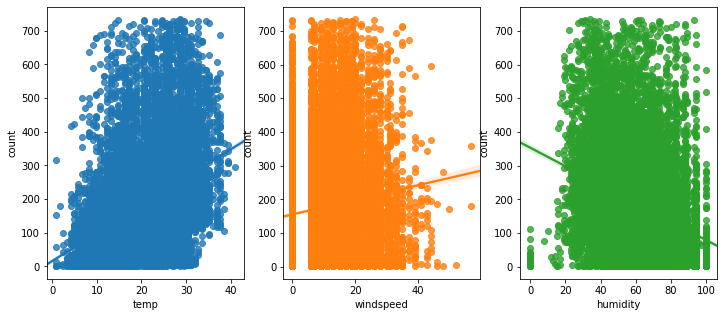

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)
sns.regplot(x = 'temp', y = 'count', data = data1_new_no_outliers, ax = ax1)
sns.regplot(x = 'windspeed', y = 'count', data = data1_new_no_outliers, ax = ax2)
sns.regplot(x = 'humidity', y = 'count', data = data1_new_no_outliers, ax = ax3)


<h3> Visualizing Distribution of Data </h3>

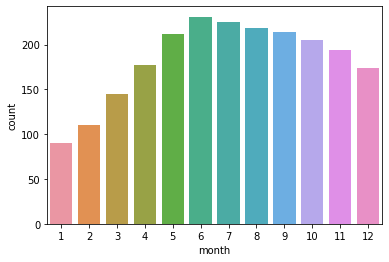

In [19]:
# fig,ax1 = plt.subplots(nrows = 4)
fig.set_size_inches(24, 40)
sorted_Order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'Auguest', 'September', 'October', 
               'November', 'December']
Hue_Order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# pic 1
monthAggregated = pd.DataFrame(data1_new_no_outliers.groupby('month')['count'].mean()).reset_index()
ax = sns.barplot(x = 'month', y = 'count', data = monthAggregated)

<h5> June, July and August has higher demands for bicycle </h5>

In [20]:
hourAggregated = pd.DataFrame(data1_new_no_outliers.groupby(['hour', 'season'], 
                                                            sort = True)['count'].mean()).reset_index()
hourAggregated_2 = pd.DataFrame(data1_new_no_outliers.groupby(['hour', 'weekday'],
                                                             sort = True)['count'].mean()).reset_index()

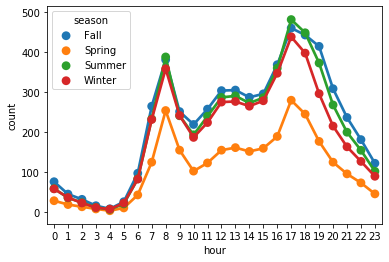

In [21]:
ax2 = sns.pointplot(x = hourAggregated['hour'], y = hourAggregated['count'], hue = hourAggregated['season'], 
               data = hourAggregated)

<h5> Spring is the season with least bicycle demands </h5>

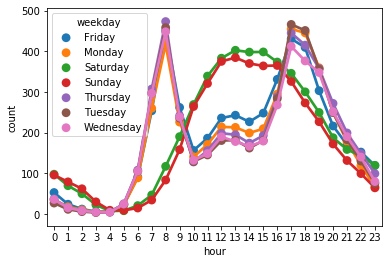

In [22]:
ax3 = sns.pointplot(x = hourAggregated_2['hour'], y = hourAggregated_2['count'], hue = hourAggregated_2['weekday'], 
            data = hourAggregated_2)

<h5> On weekday, many people tend to rend bicycle around 7-8 AM and 5-6 PM, as we mentioned earlier the rush hours</h5>
<h5> On weekend, more people tend to rend bicycle around 10 AM and 4 PM

In [23]:
HourTransformed = pd.melt(data1_new_no_outliers[['hour', 'casual', 'registered']], id_vars = ['hour'], 
                          value_vars = ['casual', 'registered'])
hourAggregated_3 = pd.DataFrame(HourTransformed.groupby(['hour', 'variable'], 
                                                        sort = True)['value'].mean()).reset_index()

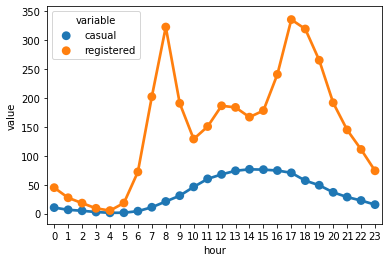

In [24]:
ax4 = sns.pointplot(x = hourAggregated_3['hour'], y = hourAggregated_3['value'], hue = hourAggregated_3['variable'], 
            hue_order = ['casual', 'registered'], data = hourAggregated_2)

<h5> The rush hour peak users from 7-8 AM and 5-6 PM are majority contributed by registered users. </h5>

In [25]:
data1_new_no_outliers.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date',
       'year', 'month', 'hour', 'weekday'],
      dtype='object')

In [26]:
data1_new_no_outliers.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16,1,2011,1,0,Saturday
1,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40,1,2011,1,1,Saturday
2,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32,1,2011,1,2,Saturday
3,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13,1,2011,1,3,Saturday
4,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1,1,2011,1,4,Saturday


<h3> Start working on Testing Data and Training Data </h3>

In [153]:
# loading training and testing data once again
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Store testing data datetime
Stored_datetime = data_test['datetime'] # 6493 values


data_comb = data_train.append(data_test)
data_comb.reset_index(inplace = True)
data_comb.drop('index', inplace = True, axis = 1)
data_comb

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [154]:
data_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.6+ MB


In [155]:
# 1. Datetime -> date, hour, weekday, month
data_comb['date'] = data_comb.datetime.apply(lambda x: x.split()[0])

data_comb.datetime = data_comb.datetime.apply(pd.to_datetime)

data_comb['year'] = data_comb.datetime.apply(lambda x: x.year)
data_comb['month'] = data_comb.datetime.apply(lambda x: x.month)
data_comb['hour'] = data_comb.datetime.apply(lambda x: x.hour)
data_comb['weekday'] = data_comb.date.apply(lambda dateString: datetime.strptime(dateString, "%Y-%m-%d").weekday())

data_comb['date'] = data_comb.datetime.apply(lambda x: x.day)

# # 2. season -> 1. spring, 2. summer, 3. fall, 4. winter
# data1_test_raw['season'] = data1_test_raw.season.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# # 3. Weather -> weather conditions
# data1_test_raw['weather'] = data1_test_raw.weather.map({
#     1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
#     2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
#     3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
#     4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' })

data_comb.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,1,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,1,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,1,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,1,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,1,2011,1,4,5


In [156]:
data_comb.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,31,2012,12,19,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,31,2012,12,20,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,31,2012,12,21,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,31,2012,12,22,0
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN,31,2012,12,23,0


<h5> Random Forest Model To Predict 0's Windspeed </h5>

In [157]:
from sklearn.ensemble import RandomForestRegressor

# use random forest to predict windspeed based on none zero windspeed values
dataWind_0 = data_comb[data_comb['windspeed'] == 0]
dataWind_Not_0 = data_comb[data_comb['windspeed'] != 0]
rf_wind = RandomForestRegressor()
windColumns = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']
rf_wind.fit(dataWind_Not_0[windColumns], dataWind_Not_0['windspeed'])

wind0values = rf_wind.predict(X = dataWind_0[windColumns])
dataWind_0['windspeed'] = wind0values

data_comb = dataWind_Not_0.append(dataWind_0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [158]:
data_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 5 to 17350
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
 12  date        17379 non-null  int64         
 13  year        17379 non-null  int64         
 14  month       17379 non-null  int64         
 15  hour        17379 non-null  int64         
 16  weekday     17379 non-

In [159]:
# Sort the entire dataframe based on datetime, and then reset the index
data_comb = data_comb.sort_values(by = 'datetime')
data_comb.reset_index(inplace = True)
data_comb.drop('index', inplace = True, axis = 1)
data_comb

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.934947,3.0,13.0,16.0,1,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.402520,8.0,32.0,40.0,1,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.402520,5.0,27.0,32.0,1,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.335967,3.0,10.0,13.0,1,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.335967,0.0,1.0,1.0,1,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,31,2012,12,19,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,31,2012,12,20,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,31,2012,12,21,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,31,2012,12,22,0


<h3> Coercing to Categorical Type </h3>

In [160]:
# identify different data types:
cate_feature = ['season', 'holiday', 'workingday', 'weather', 'weekday', 'month', 'year', 'hour']
numer_feature = ['temp', 'humidity', 'windspeed', 'atemp']
dropFeatures = ['casual', 'count', 'datetime', 'date', 'registered']

In [161]:
for value in cate_feature:
    data_comb[value] = data_comb[value].astype('category')

data_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   holiday     17379 non-null  category      
 3   workingday  17379 non-null  category      
 4   weather     17379 non-null  category      
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
 12  date        17379 non-null  int64         
 13  year        17379 non-null  category      
 14  month       17379 non-null  category      
 15  hour        17379 non-null  category      
 16  weekday     17379 non-

<h3> Splitting Training and Testing Data </h3>

In [162]:
data_training = data_comb[pd.notnull(data_comb['count'])].sort_values(by = ['datetime'])
data_testing = data_comb[~pd.notnull(data_comb['count'])].sort_values(by = ['datetime'])
#data_training

In [163]:
#data_testing

In [164]:
# set y labels
yLabels = data_training['count']

In [165]:
# dropping unncessary variables:
data_training = data_training.drop(dropFeatures, axis = 1)
data_testing = data_testing.drop(dropFeatures, axis = 1)

In [166]:
# RMSLE (Root Mean Squared Log Error) Scorer

def rmsle(y, y_, convertExp = True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

<h3> Linear Regression Modeling </h3>

In [167]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

LR_model = LinearRegression()
yLabelsLog = np.log1p(yLabels) # use np.log1p since log(0) will result infinity value, hence use log1p = log(data+1) 
LR_model.fit(X = data_training, y = yLabelsLog)

LR_pred = LR_model.predict(X = data_training)
print('RMSLE for Linear Regression is: {}'.format(rmsle(np.exp(yLabelsLog),np.exp(LR_pred), False)))

RMSLE for Linear Regression is: 0.9779942996836537


<h3> Regularization Model - Ridge </h3>

In [170]:
ridge_model = Ridge()
ridge_params = { 'max_iter':[3000], 'alpha': [0.1, 1,2,3,4,10,30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
grid_ridge_m = GridSearchCV(ridge_model, ridge_params, scoring = rmsle_scorer, cv = 5)

yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit(data_training, yLabelsLog)
preds = grid_ridge_m.predict(X = data_training)
print(grid_ridge_m.best_params_)

print('RMSLE value for Ridge Regression: {}'.format(rmsle(np.exp(yLabelsLog), np.exp(preds), False)))

{'alpha': 0.1, 'max_iter': 3000}
RMSLE value for Ridge Regression: 0.9779942846307873


<h3> Lasso </h3>

In [171]:
Lasso_model = Lasso()
alpha = 1/np.array([0.1, 1,2,3,4,10,30,100,200,300,400,800,900,1000])
Lasso_params = { 'max_iter':[3000], 'alpha': alpha}


grid_Lasso_m = GridSearchCV(Lasso_model, Lasso_params, scoring = rmsle_scorer, cv = 5)

yLabelsLog = np.log1p(yLabels)
grid_Lasso_m.fit(data_training, yLabelsLog)
preds = grid_Lasso_m.predict(X = data_training)
print(grid_Lasso_m.best_params_)

print('RMSLE value for Lasso Regression: {}'.format(rmsle(np.exp(yLabelsLog), np.exp(preds), False)))

{'alpha': 0.005, 'max_iter': 3000}
RMSLE value for Lasso Regression: 0.9781312559631667


<h3> Ensemble Models - Random Forest </h3>

In [172]:
RF_model = RandomForestRegressor(n_estimators = 100)
yLabelsLog = np.log1p(yLabels)
RF_model.fit(data_training, yLabelsLog)
preds = RF_model.predict(X = data_training)
print("RMSLE Value For Random Forest: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

RMSLE Value For Random Forest:  0.10366811709265553


<h3> Ensemble Model - Gradient Boost </h3>

In [174]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01)
yLabelsLog = np.log1p(yLabels)
gbm.fit(data_training, yLabelsLog)
preds = gbm.predict(X = data_training)
print("RMSLE Value for Gradient Boost: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

RMSLE Value for Gradient Boost:  0.18959674400167362


<h5> Comparing the distribution of Train and Test results </h5>

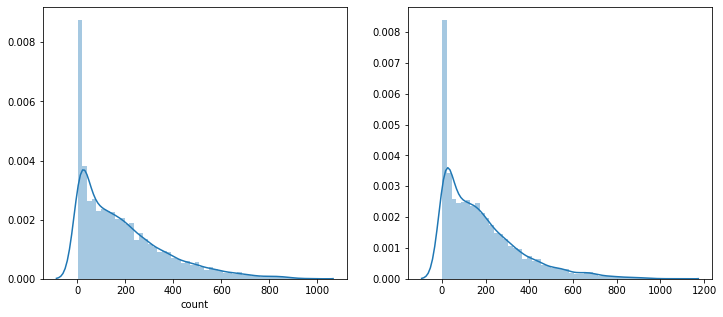

In [177]:
predsTest = gbm.predict(X = data_testing)
fig,(ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(12, 5)

sns.distplot(yLabels, ax = ax1, bins = 50)
sns.distplot(np.exp(predsTest), ax = ax2, bins = 50)

We can see that these distribution of training and testing looks identical, 
which means our model has not predicted bad and not suffering from major overfitting problems

<h5> Output result </h5>

In [178]:
submission = pd.DataFrame({
    'datetime': Stored_datetime,
    'count': [max(0,x) for x in np.exp(predsTest)]
})

submission.to_csv('Bike_prediction_gbm.csv', index = False)